# Bert Topic

In [3]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()

# Add the parent directory of 'scrapping' to the system path
sys.path.append(os.path.abspath(os.path.join(current_dir, '..', 'scrapping')))

# Now you can import the function
from text_cleaner import read_and_clean_adrs, read_and_clean_adrs2

from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from markdown2 import markdown
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.lda_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Path to the ADR directory
adr_directory = "../../data/ADRs-Updated"

In [4]:
cleaned_texts = read_and_clean_adrs(adr_directory, save=False)

In [22]:
from bertopic import BERTopic

# if left as is --> number of topics is 91
# use nr_topics="auto" to automatically determine the number of topics
bert_topic_1 = BERTopic(nr_topics="auto")
topics, probs = bert_topic_1.fit_transform(cleaned_texts)

In [23]:
bert_topic_1.visualize_documents(cleaned_texts, hide_annotations=True)

In [24]:
bert_topic_1.visualize_topics()

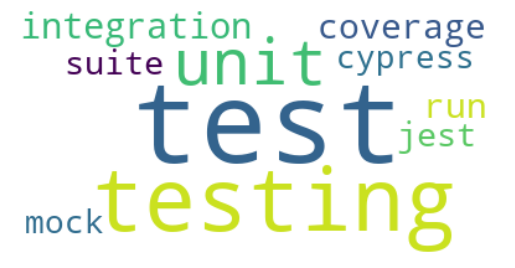

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(bert_topic_1, topic=2)